<a href="https://colab.research.google.com/github/UttaraKet1607/Hindi-Character-Recognition/blob/main/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download zip files from here : https://drive.google.com/drive/folders/1O8TT0s4zMyiI6zR-biVRoiLiAUy-W1H0

In [ ]:
! unzip "test.zip"

In [ ]:
! unzip "training.zip"

# Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Label Encoding & EDA

In [ ]:
imgs_path = "./training"
test_imgs = "./test"
data_list = []
labels_list = []
classes_list = ["background","hi"]
for i in classes_list:
    i_path = os.path.join(imgs_path, i) 
    if i == "background":
      for img in os.listdir(i_path):
          im = Image.open(i_path +'/'+ img)
          im = im.resize((50,50))
          im = np.array(im)
          data_list.append(im)
          labels_list.append(0)
    if i == "hi":
      for img in os.listdir(i_path):
          im = Image.open(i_path +'/'+ img)
          im = im.resize((50,50))
          im = np.array(im)
          data_list.append(im)
          labels_list.append(1)
    

In [ ]:
x = np.random.randint(5875)
print(x , labels_list[x])

587 0


In [ ]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(5875, 50, 50, 3)


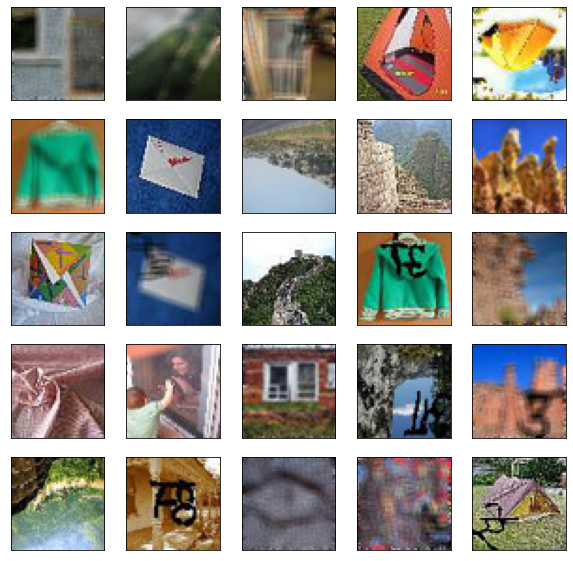

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(5875)], cmap=plt.cm.binary)
    
plt.show()

# Data Augmentation

In [ ]:
generator = image.ImageDataGenerator(rescale=1./255, rotation_range=40,       # rotating the image by upto 40 degrees in the augmented data
      width_shift_range=0.2,   # increasing and decreasing the width of the image
      height_shift_range=0.2,  # increasing and decreasing the height of the image
      shear_range=0.2,         # shear transformations
      zoom_range=0.2,          # zooming upto 20% of the original 
      horizontal_flip=True,    # mirror image
      fill_mode="nearest")
train_datagen = generator.flow_from_directory(imgs_path,target_size=(150,150),classes=classes_list,class_mode='binary',batch_size=20)

Found 5875 images belonging to 2 classes.


# Model Building 

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(128, activation= "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="SGD")

In [ ]:
model.fit(train_datagen, epochs=5)

Epoch 1/5
294/294 [==============================] - 151s 511ms/step - loss: 0.5581 - accuracy: 0.7554
Epoch 2/5
294/294 [==============================] - 151s 513ms/step - loss: 0.5476 - accuracy: 0.7574
Epoch 3/5
294/294 [==============================] - 155s 527ms/step - loss: 0.5463 - accuracy: 0.7574
Epoch 4/5
294/294 [==============================] - 150s 509ms/step - loss: 0.5450 - accuracy: 0.7574
Epoch 5/5
294/294 [==============================] - 157s 534ms/step - loss: 0.5407 - accuracy: 0.7574
